In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'/mnt/d/BusinessSuiteData/BS_epsilon_data/cookie_cats.csv')

In [3]:
df.head(3)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False


In [4]:
# Count players in each AB groups

df.groupby('version')['userid'].count().to_frame()

,userid
version,
gate_30,44700
gate_40,45489


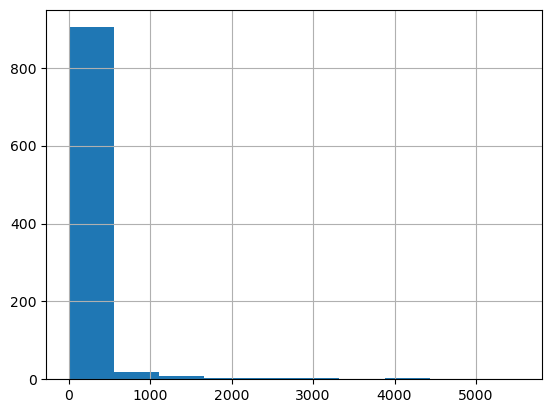

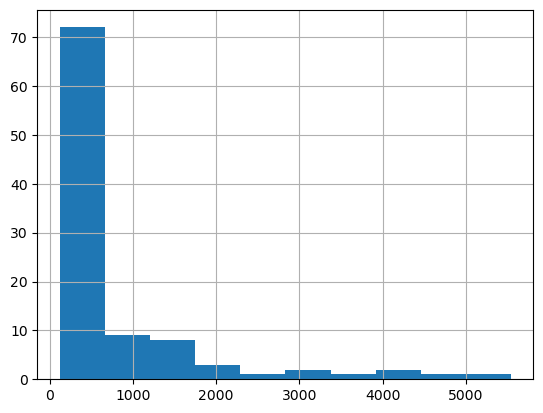

In [5]:
# Plot the distribution of sum_gamerounds

df.groupby('sum_gamerounds')['userid'].count().hist()
plt.show();

# First 100

df.groupby('sum_gamerounds')['userid'].count().head(100).hist()
plt.show();

Retantion after 1 day

In [6]:
# Calculates overall retention_1

pd.concat([df['retention_1'].value_counts(), 
           df['retention_1'].value_counts(normalize=True).mul(100).to_frame(name='%')], 
           axis=1)

,retention_1,%
False,50036,55.47905
True,40153,44.52095


In [7]:
# Calculates retention_1 by groups

pd.concat([df.groupby('version')['retention_1'].value_counts(), 
           df.groupby('version')['retention_1'].value_counts(normalize=True).mul(100).to_frame(name='%')], 
           axis=1)

retention_1          %
version retention_1                        
gate_30 False              24666  55.181208
        True               20034  44.818792
gate_40 False              25370  55.771725
        True               20119  44.228275

Is the difference 44.81 VS 44.22 significative ?

    NB: even small changes in retention can have a large impact

In [8]:
# Bootstrap analysis

# NB : GROUPBY : takes means of each group per iteration

bootstrap_means_list = []

for i in range(500):
    sample_mean = df.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()
    bootstrap_means_list.append(sample_mean)

# e.g bootstrap_means_list

bootstrap_means_list[:5]
print('...')

# NB : Note that in this notebook we have limited the number of bootstrap replication to 500 to keep the calculations quick. 
# In "production" we would likely increase this to a much larger number, say, 10 000

[version
 gate_30    0.447194
 gate_40    0.443627
 Name: retention_1, dtype: float64,
 version
 gate_30    0.444897
 gate_40    0.445032
 Name: retention_1, dtype: float64,
 version
 gate_30    0.452701
 gate_40    0.439213
 Name: retention_1, dtype: float64,
 version
 gate_30    0.451109
 gate_40    0.442635
 Name: retention_1, dtype: float64,
 version
 gate_30    0.450526
 gate_40    0.442691
 Name: retention_1, dtype: float64]

...


In [9]:
# Note on frac 1 and replace = True : same size than the sampled pop (frac == 1), replace : draw =1 replace, draw = 1, etc.

df.duplicated().value_counts()

df.sample(frac = 1, replace = True).duplicated().value_counts()

df.sample(frac = 1, replace = True).duplicated().value_counts()

False    90189
dtype: int64

False    57025
True     33164
dtype: int64

False    56982
True     33207
dtype: int64

In [10]:
# Converts in a dataframe

bootstrap_means_df = pd.DataFrame(bootstrap_means_list)

bootstrap_means_df[:5]
print('...')

version,gate_30,gate_40
retention_1,0.447194,0.443627
retention_1,0.444897,0.445032
retention_1,0.452701,0.439213
retention_1,0.451109,0.442635
retention_1,0.450526,0.442691


...


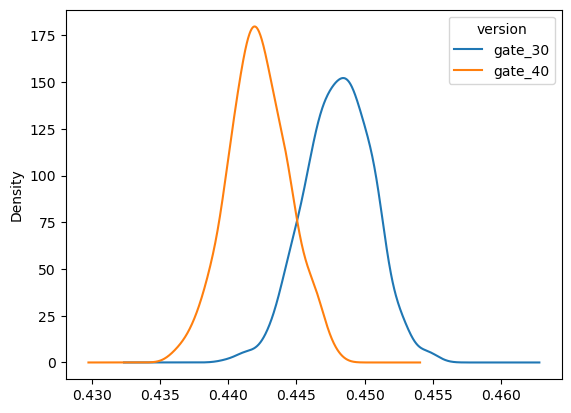

In [11]:
# Plots repective distributions

bootstrap_means_df.plot(kind='kde')
plt.show();

version,gate_30,gate_40,diff
retention_1,0.447194,0.443627,0.803972
retention_1,0.444897,0.445032,-0.030355
retention_1,0.452701,0.439213,3.070779
retention_1,0.451109,0.442635,1.914511
retention_1,0.450526,0.442691,1.769811


...


<AxesSubplot:ylabel='Frequency'>

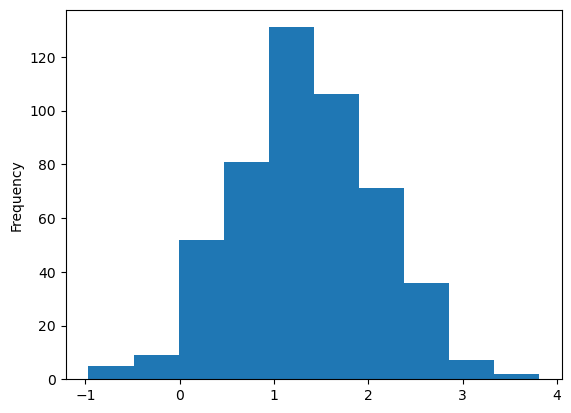

In [12]:
# calculate % of difference between gate_30 and gate_40 

# computes how much larger gate 30 is compared to gate 40 

bootstrap_means_df['diff'] = (bootstrap_means_df['gate_30'] - bootstrap_means_df['gate_40'])/bootstrap_means_df['gate_40']*100

bootstrap_means_df[:5]
print('...')

bootstrap_means_df['diff'].plot(kind='hist')
plt.show()

# Most of differences are between 1 to 2 %
# Most of the distribution is above 0

In [13]:
# 97 % of samples have a difference higher than 0 %

prob_above_0 = (bootstrap_means_df['diff'] > 0).mean() * 100 

prob_above_0

97.0

Conclusion Retention 1 : 

    There is a high probability that gate 30 have a greater retention compared to gate 40 

Rentention 7

In [14]:
# Calculates overall retention_7

pd.concat([df['retention_7'].value_counts(), 
           df['retention_7'].value_counts(normalize=True).mul(100).to_frame(name='%')], 
           axis=1)

,retention_7,%
False,73408,81.393518
True,16781,18.606482


In [15]:
# Calculates retention_7 by groups

pd.concat([df.groupby('version')['retention_7'].value_counts(), 
           df.groupby('version')['retention_7'].value_counts(normalize=True).mul(100).to_frame(name='%')], 
           axis=1)

retention_7          %
version retention_7                        
gate_30 False              36198  80.979866
        True                8502  19.020134
gate_40 False              37210  81.799996
        True                8279  18.200004

In [16]:
# Bootstrap analysis

bootstrap_means_list = []

for i in range(500):
    sample_mean = df.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()
    bootstrap_means_list.append(sample_mean)

bootstrap_means_list[:5]
print('...')

[version
 gate_30    0.188442
 gate_40    0.184025
 Name: retention_7, dtype: float64,
 version
 gate_30    0.189144
 gate_40    0.183795
 Name: retention_7, dtype: float64,
 version
 gate_30    0.191567
 gate_40    0.182046
 Name: retention_7, dtype: float64,
 version
 gate_30    0.195365
 gate_40    0.181339
 Name: retention_7, dtype: float64,
 version
 gate_30    0.187044
 gate_40    0.183078
 Name: retention_7, dtype: float64]

...


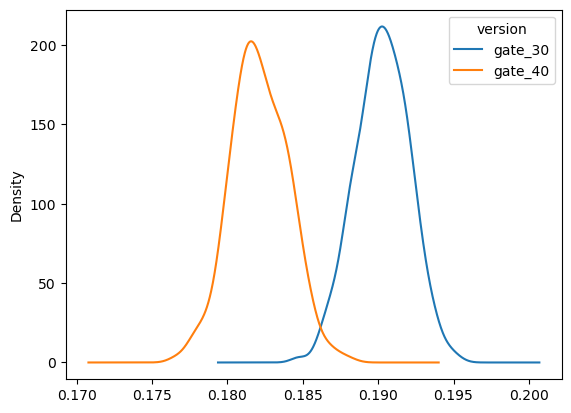

In [17]:
# Converts in a dataframe

bootstrap_means_df = pd.DataFrame(bootstrap_means_list)

# Plots repective distributions

bootstrap_means_df.plot(kind='kde')
plt.show();

<AxesSubplot:ylabel='Frequency'>

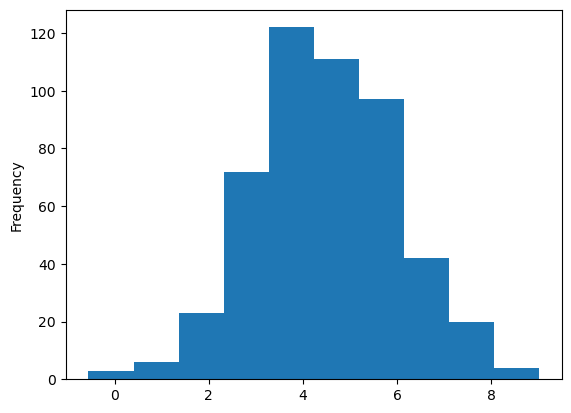

In [18]:
# calculate % of difference between gate_30 and gate_40 

# computes how much larger gate 30 is compared to gate 40 

bootstrap_means_df['diff'] = (bootstrap_means_df['gate_30'] - bootstrap_means_df['gate_40'])/bootstrap_means_df['gate_40']*100

bootstrap_means_df['diff'].plot(kind='hist')
plt.show()

# Most of differences are between 3 to 6 %
# Most of the distribution is above 0

In [19]:
# 99.8 % of samples have a difference higher than 0 %

prob_above_0 = (bootstrap_means_df['diff'] > 0).mean() * 100 

prob_above_0

99.8

Conclusion Retention 7 : 

    There is a strong evidence that gate 30 have a greater retention compared to gate 40 

Overall Conclusion :

    Forcing the player to stop at gate 30 increase (from 1 day to 7 day) the retention of the player
    One might reflect on marginal utility or hedonic adaptation to find possible explanation of these observations 